In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder , StandardScaler, LabelEncoder

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
df.shape

(205, 26)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Data Cleaning and Exploratory Data Analysis

In [10]:
#cleaning Car Name to keep only brand(company) name and remove model names 
df['CarName']=df['CarName'].apply(lambda x:x.split(' ', 1)[0])
df.rename(columns = {'CarName':'companyname'}, inplace = True)
df.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
df.companyname.nunique()

28

In [13]:
# Fixing values in company name
df.companyname = df.companyname.str.lower()

def replace_name(a,b):
    df.companyname.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
df.companyname.nunique()

22

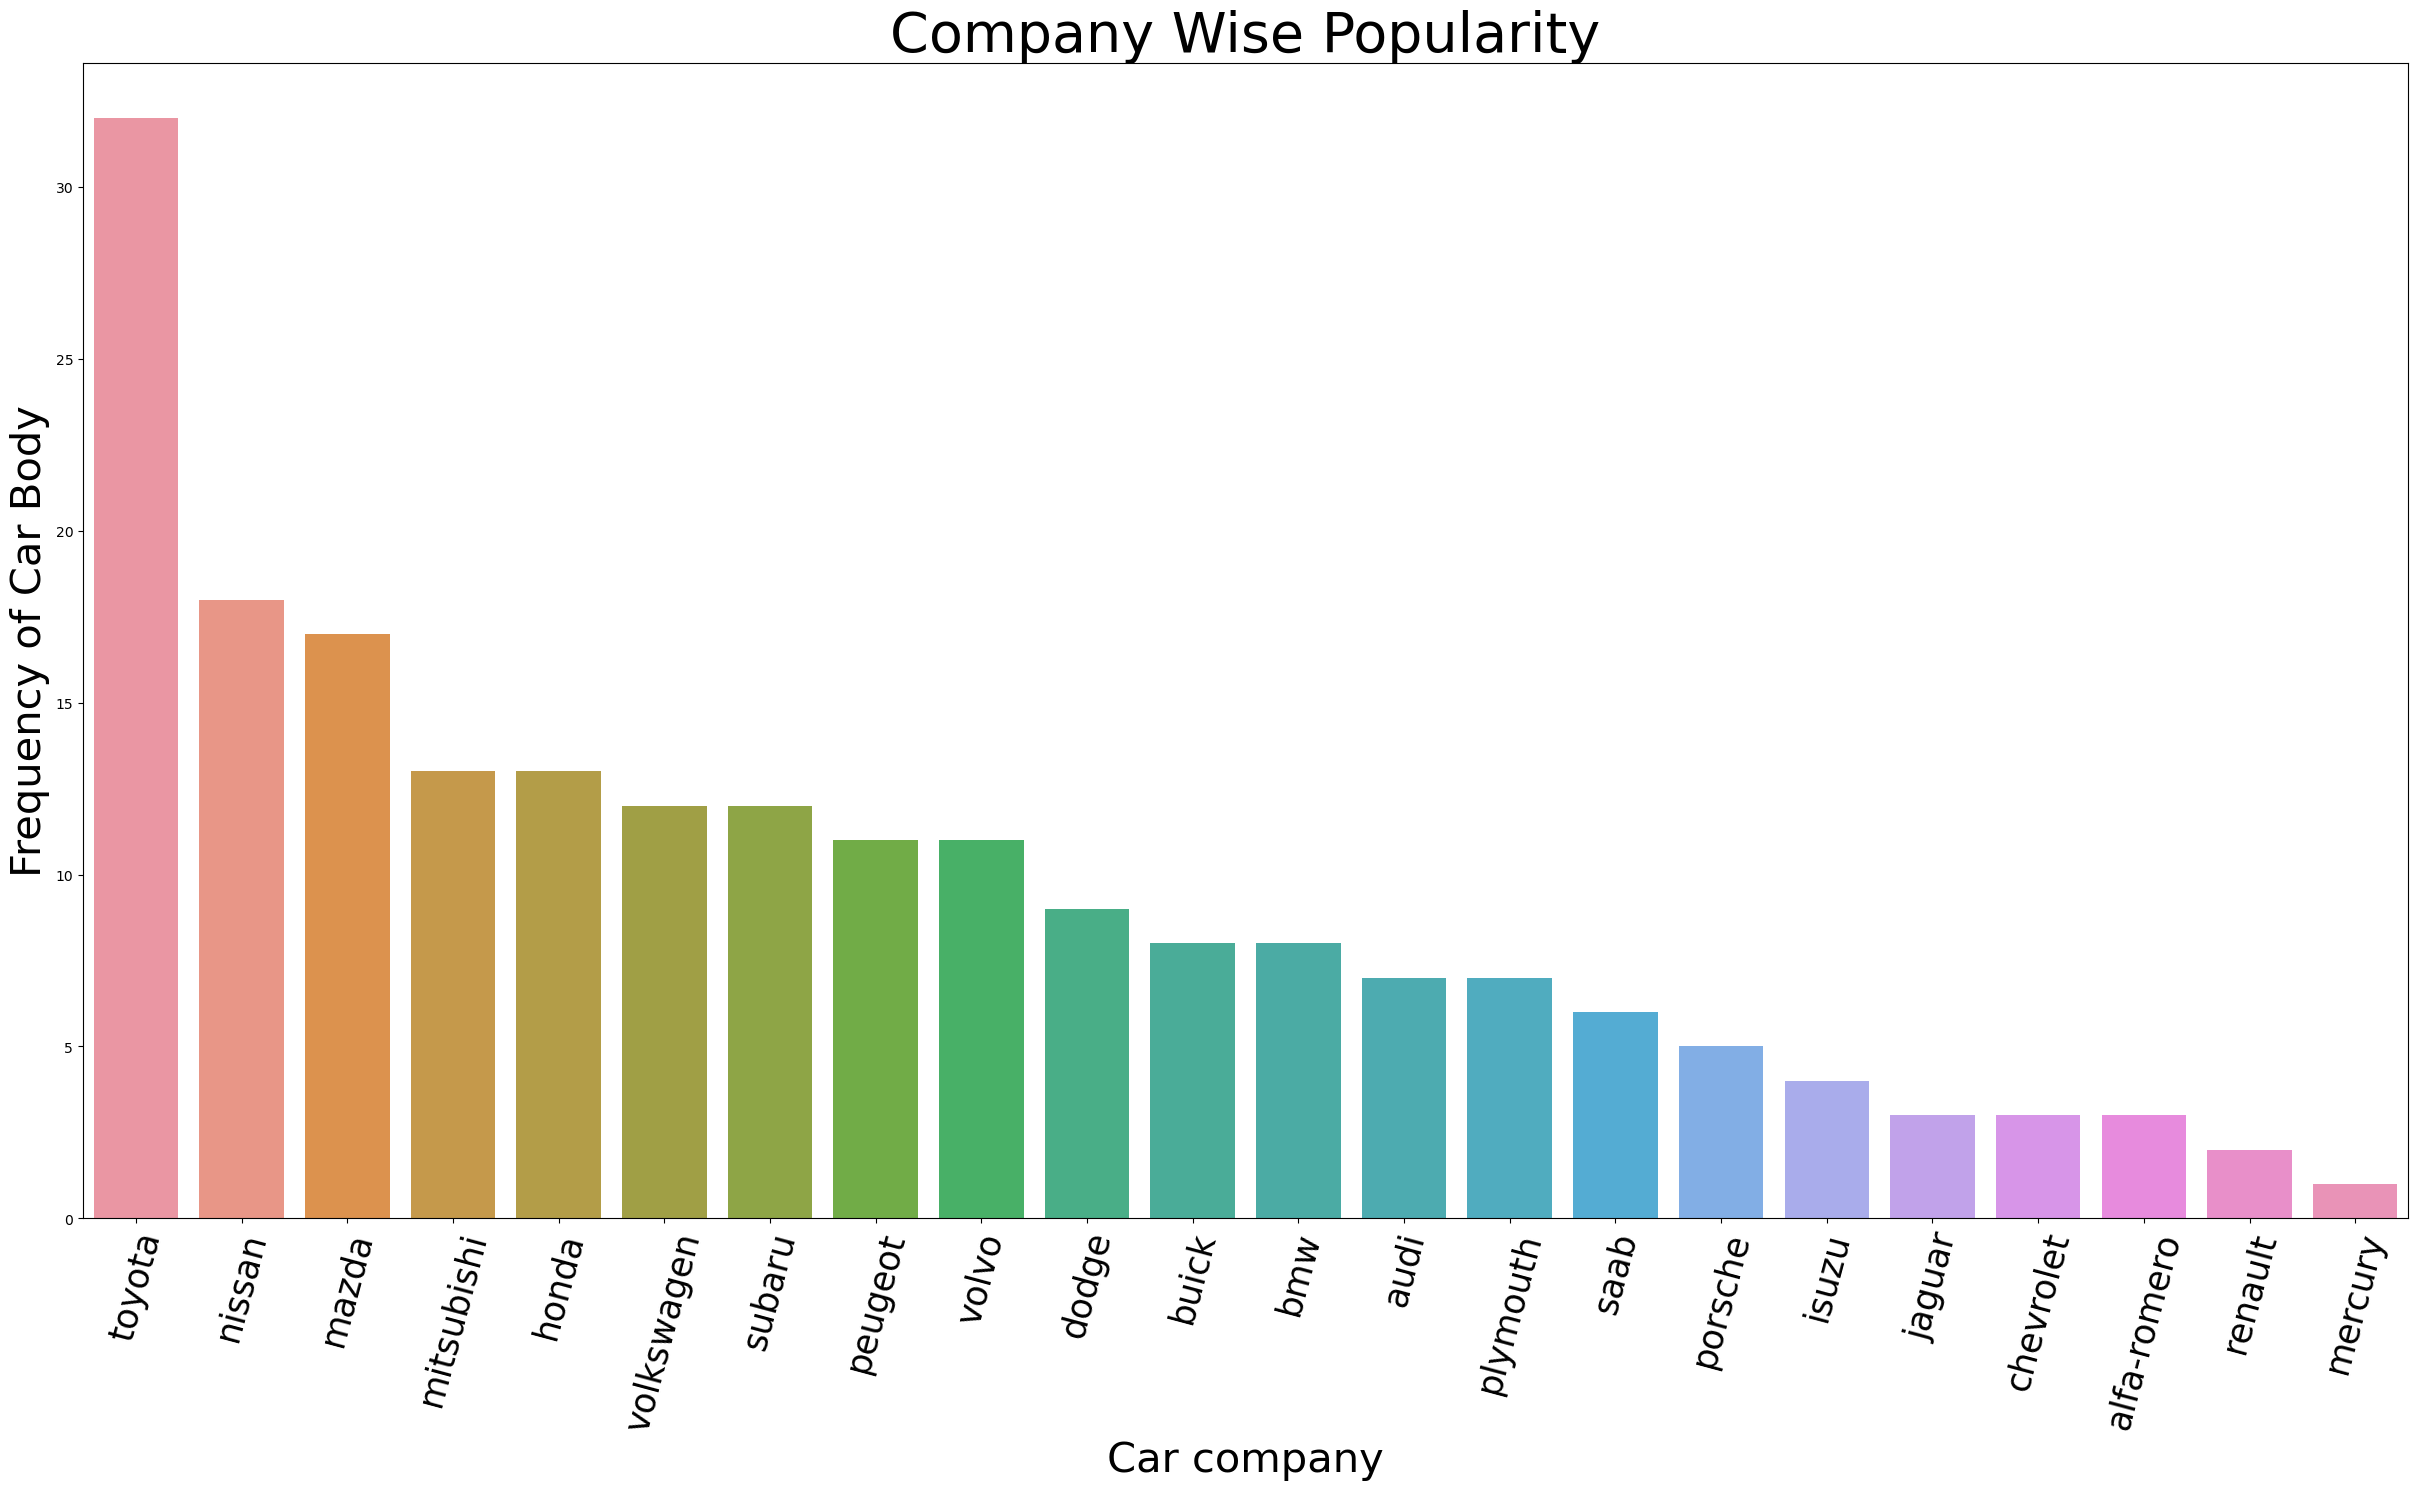

In [15]:
#plotting count of company names

plt.figure(figsize=(30, 15))
plt1=sns.countplot(x=df.companyname, data=df, order= df.companyname.value_counts().index)
plt.title('Company Wise Popularity', size=40)
plt1.set_xlabel('Car company', fontsize=30)
plt1.set_ylabel('Frequency of Car Body', fontsize=30)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=75, size=25)
plt.show()

C:\Users\Aayush\AppData\Local\Temp\ipykernel_2908\3429958693.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt1.set_yticklabels(plt1.get_yticklabels(),rotation=360, size=25)


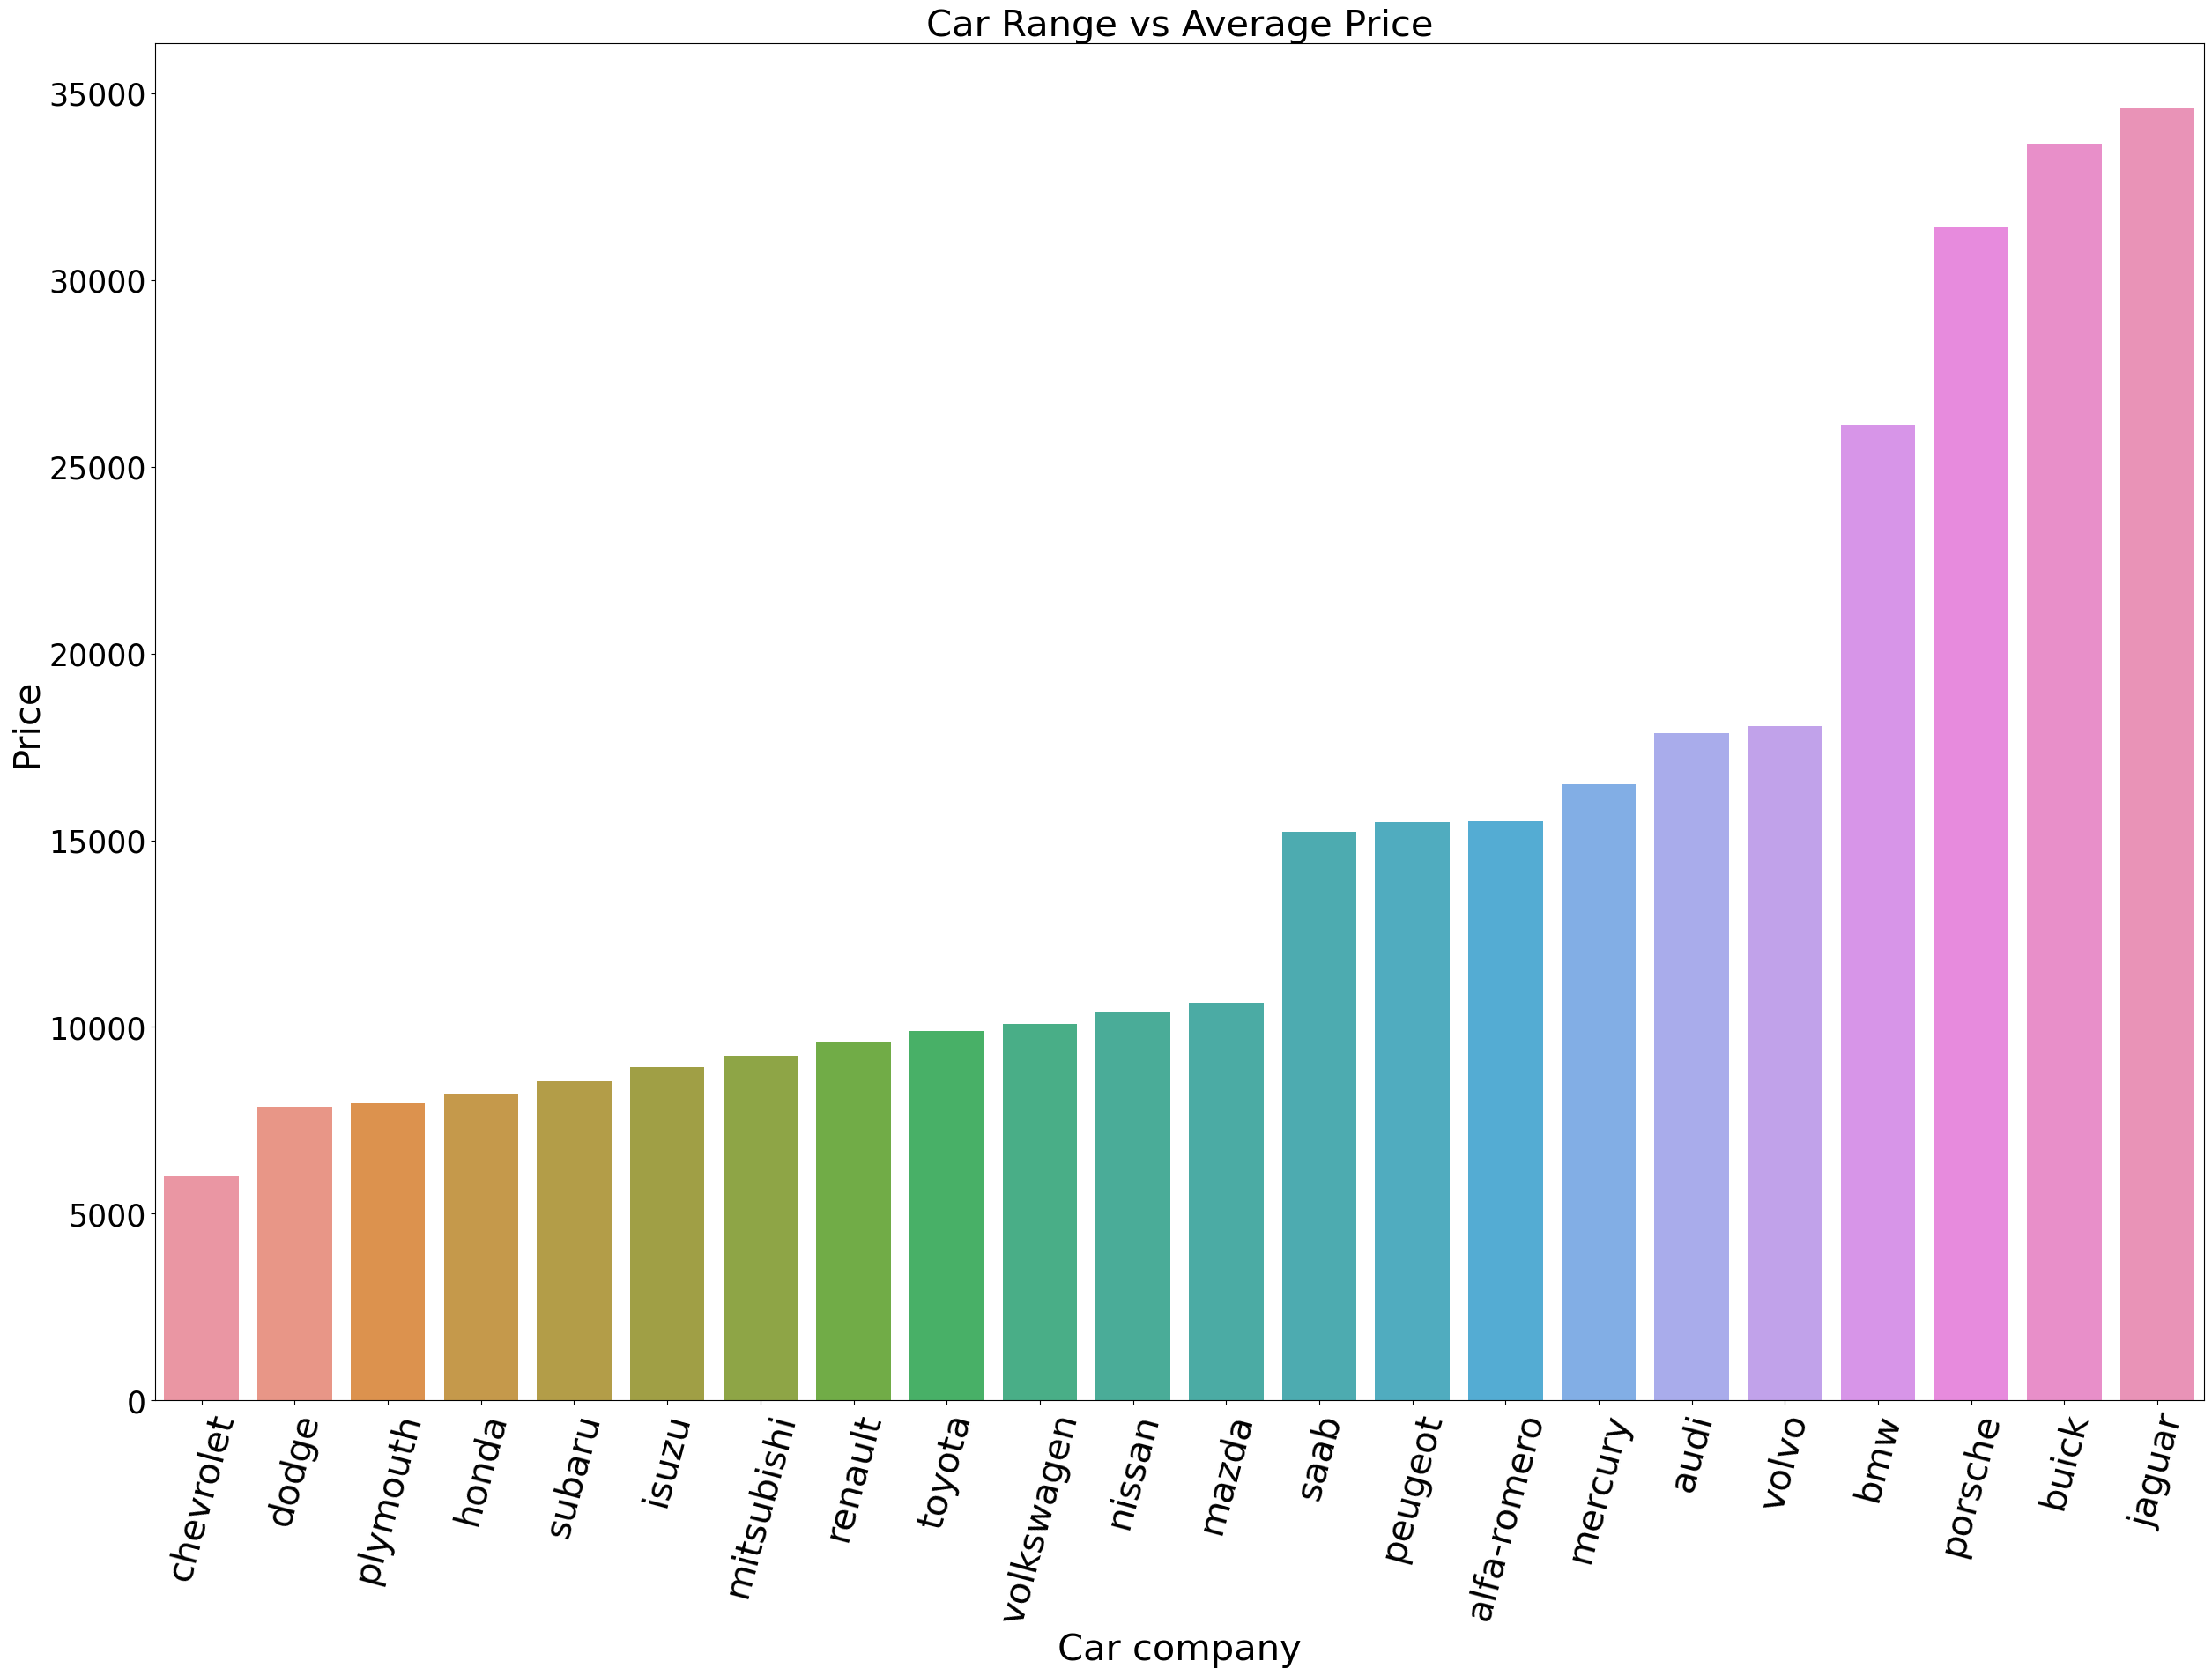

In [16]:
#plotting company wise average price of car

plt.figure(figsize=(30, 20))

df1 = pd.DataFrame(df.groupby(['companyname'])['price'].mean().sort_values())
df1=df1.reset_index(drop=False)
plt1=sns.barplot(x="companyname", y="price", data=df1)
plt1.set_title('Car Range vs Average Price', size=30)
plt1.set_xlabel('Car company', fontsize=30)
plt1.set_ylabel('Price', fontsize=30)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=75, size=30)
plt1.set_yticklabels(plt1.get_yticklabels(),rotation=360, size=25)
plt.show()

In [18]:
df['fueltype'].value_counts().reset_index()

,index,fueltype
0,gas,185
1,diesel,20


Text(0, 0.5, 'Count')

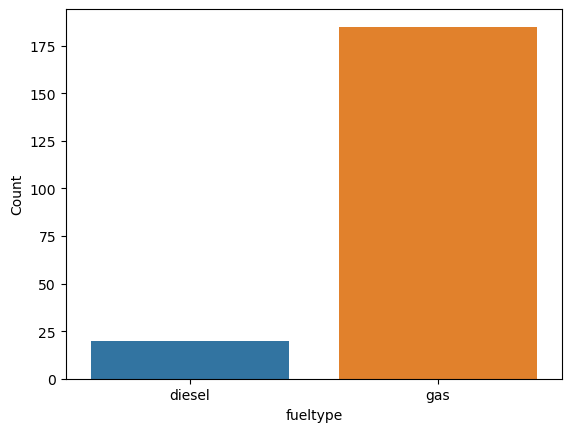

In [19]:
p2= df.groupby('fueltype')['fueltype'].count()
sns.barplot(x=p2.index,y=p2.values)
plt.ylabel("Count")

In [20]:
df['doornumber'].value_counts().reset_index()

,index,doornumber
0,four,115
1,two,90


Text(0, 0.5, 'Count')

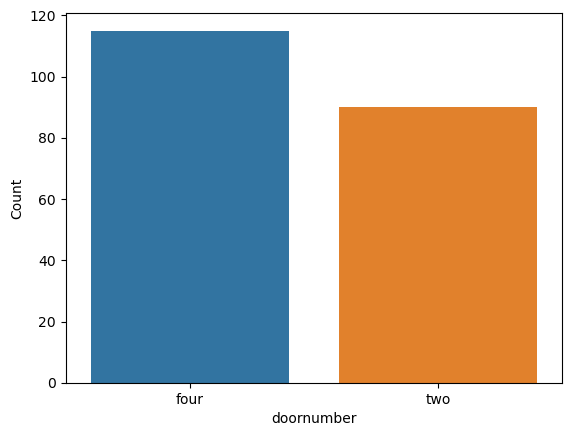

In [21]:
p3= df.groupby('doornumber')['doornumber'].count()
sns.barplot(x=p3.index,y=p3.values)
plt.ylabel("Count")

In [22]:
#Binning the Car Companies based on avg prices of each Company.

def replace_values(a,b):
    df.companyname.replace(a,b,inplace=True)

replace_values('chevrolet','Low_End')
replace_values('dodge','Low_End')
replace_values('plymouth','Low_End')
replace_values('honda','Low_End')
replace_values('subaru','Low_End')
replace_values('isuzu','Low_End')
replace_values('mitsubishi','Budget')
replace_values('renault','Budget')
replace_values('toyota','Budget')
replace_values('volkswagen','Budget')
replace_values('nissan','Budget')
replace_values('mazda','Budget')
replace_values('saab','Medium')
replace_values('peugeot','Medium')
replace_values('alfa-romero','Medium')
replace_values('mercury','Medium')
replace_values('audi','Medium')
replace_values('volvo','Medium')
replace_values('bmw','High_End')
replace_values('porsche','High_End')
replace_values('buick','High_End')
replace_values('jaguar','High_End')

df.rename(columns = {'companyname':'segment'}, inplace = True)
df.head()

,car_ID,symboling,segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,Medium,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,Medium,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,Medium,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,Medium,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,Medium,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<Axes: xlabel='segment', ylabel='price'>

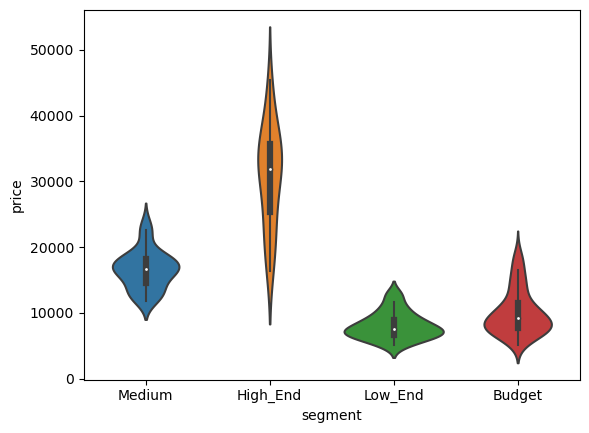

In [23]:
sns.violinplot(x='segment' , y='price', data=df)

<Axes: xlabel='symboling', ylabel='price'>

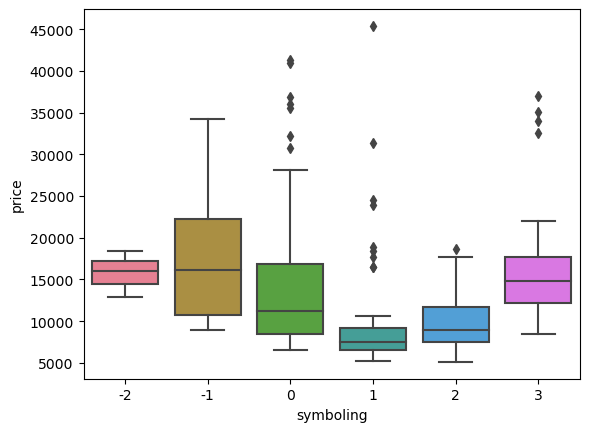

In [24]:
 sns.boxplot(x=df['symboling'], y=df.price, palette=("husl"))

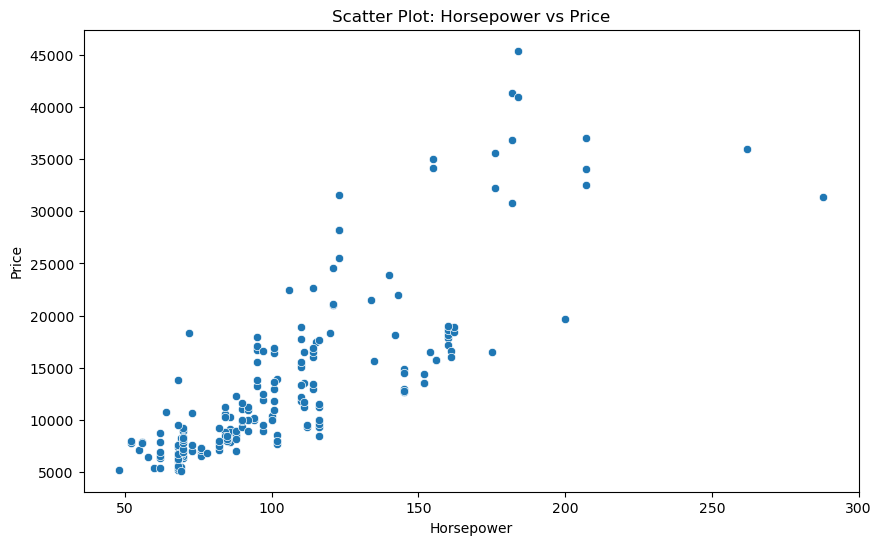

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='horsepower', y='price')
plt.title('Scatter Plot: Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()


<Axes: xlabel='fueltype', ylabel='price'>

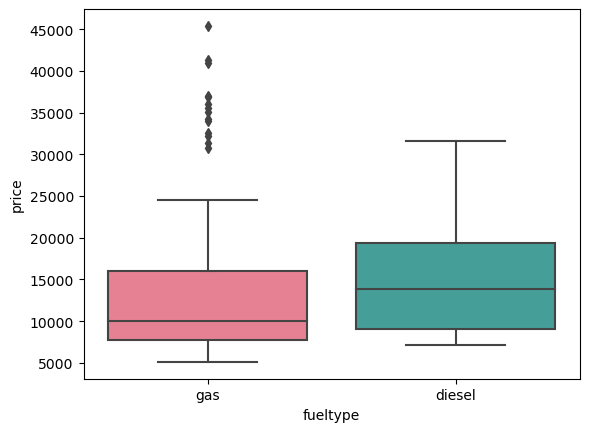

In [26]:
 sns.boxplot(x=df['fueltype'], y=df.price, palette=("husl"))

C:\Users\Aayush\AppData\Local\Temp\ipykernel_2908\273027164.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


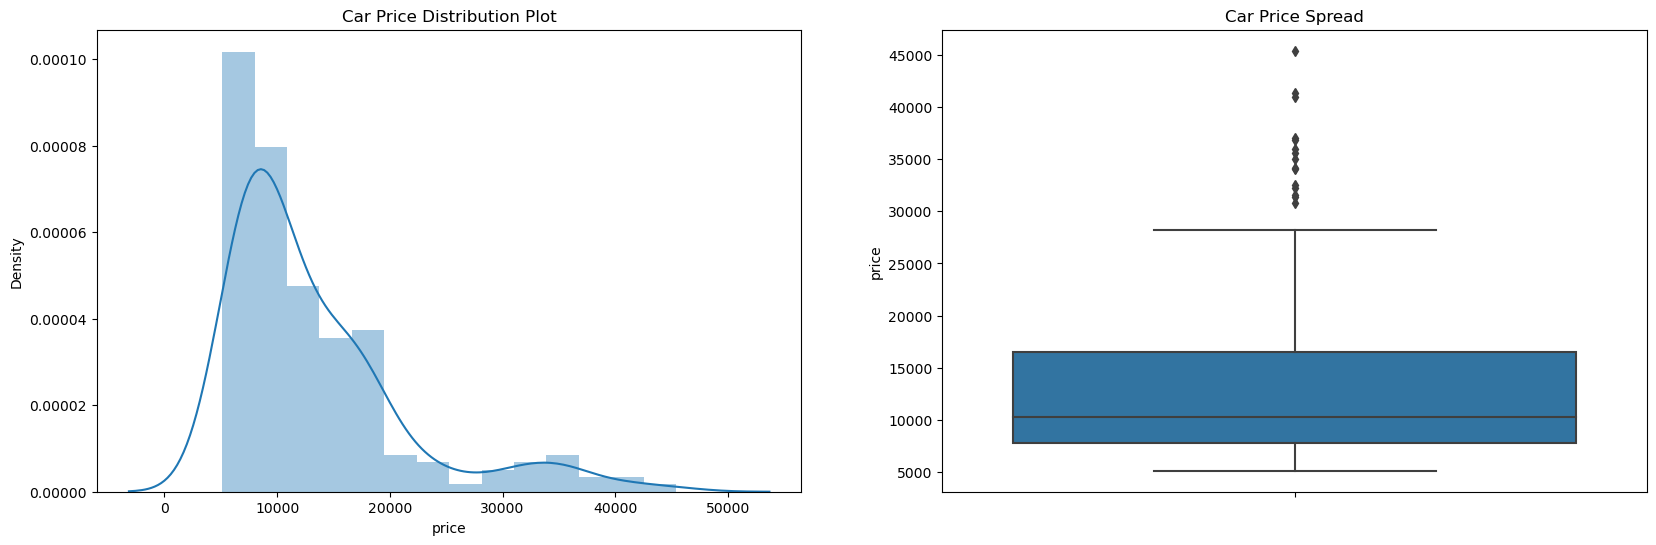

In [27]:


plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

The plot is right-skewed, meaning that the most prices in the dataset are low (Below 15,000).
There is a significant difference between the mean and the median of the price distribution.
There is a high variance in the car prices, data points are far spread out from the mean.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   segment           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [29]:
categorical_columns = ['segment','fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [30]:

numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [31]:
droped_columns = ["car_ID","symboling","doornumber", "enginelocation", "fuelsystem", "highwaympg","compressionratio","stroke"]

# drop columns 
df.drop(columns = droped_columns, inplace = True)

In [32]:
df

,segment,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,peakrpm,citympg,price
0,3,1,0,0,2,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0,2,0.074449,0.519071,0.174483,-0.262960,-0.646553,13495.0
1,3,1,0,0,2,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0,2,0.074449,0.519071,0.174483,-0.262960,-0.646553,16500.0
2,3,1,0,2,2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,5,3,0.604046,-2.404880,1.264536,-0.262960,-0.953012,16500.0
3,3,1,0,3,1,0.173698,0.207256,0.136542,0.235942,-0.420797,3,2,-0.431076,-0.517266,-0.053668,0.787855,-0.186865,13950.0
4,3,1,0,3,0,0.107110,0.207256,0.230001,0.235942,0.516807,3,1,0.218885,-0.517266,0.275883,0.787855,-1.106241,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,3,1,0,3,2,1.721873,1.198549,1.398245,0.728239,0.763241,3,2,0.339248,1.666445,0.250533,0.577692,-0.340094,16845.0
201,3,1,1,3,2,1.721873,1.198549,1.351515,0.728239,0.949992,3,2,0.339248,1.666445,1.416637,0.367529,-0.953012,19045.0
202,3,1,0,3,2,1.721873,1.198549,1.398245,0.728239,0.878757,5,3,1.109571,0.926204,0.757535,0.787855,-1.106241,21485.0
203,3,0,1,3,2,1.721873,1.198549,1.398245,0.728239,1.273437,3,3,0.435538,-1.183483,0.047732,-0.683286,0.119594,22470.0


In [33]:
x = df.drop(['price'], axis=1) 
y = df['price']

In [34]:
x_train, x_test, y_train, y_test =train_test_split(x,y , train_size=0.8, random_state=42) #from sklearn.model_selection is module

In [35]:
model=LinearRegression()

In [36]:
model.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred =model.predict(x_test)

In [38]:
r2=r2_score(y_test, y_pred)
print("R2 Score: ",r2)

R2 Score:  0.815491315836942


In [39]:
mae=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ",mae)

Mean Absolute Error :  2671.4306358760155


In [40]:
mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error : ",mse)

Mean Squared Error :  14565857.415046614


In [41]:
rmse=np.sqrt(mse)
print("Root Mean Squared Error : ",rmse)

Root Mean Squared Error :  3816.5242584119146


In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
params = {
         "fit_intercept": [True, False]
      }

In [77]:
gs = GridSearchCV(model,params,cv=10)

In [78]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [79]:
print(gs.best_params_)

{'fit_intercept': True}


In [80]:
    print(gs.best_score_)

0.7713131722724179


In [81]:
y_pred1 =gs.predict(x_test)

In [82]:
r3=r2_score(y_test, y_pred1)
print("R2 Score: ",r3)

R2 Score:  0.815491315836942
